# <center> PCA using Crabs dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(display='text')
np.set_printoptions(suppress=True)

In [2]:
data = pd.read_csv('./crabs.csv')
data.head(10)

sp sex  index    FL    RW    CL    CW    BD
0  B   M      1   8.1   6.7  16.1  19.0   7.0
1  B   M      2   8.8   7.7  18.1  20.8   7.4
2  B   M      3   9.2   7.8  19.0  22.4   7.7
3  B   M      4   9.6   7.9  20.1  23.1   8.2
4  B   M      5   9.8   8.0  20.3  23.0   8.2
5  B   M      6  10.8   9.0  23.0  26.5   9.8
6  B   M      7  11.1   9.9  23.8  27.1   9.8
7  B   M      8  11.6   9.1  24.5  28.4  10.4
8  B   M      9  11.8   9.6  24.2  27.8   9.7
9  B   M     10  11.8  10.5  25.2  29.3  10.3

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp      200 non-null    object 
 1   sex     200 non-null    object 
 2   index   200 non-null    int64  
 3   FL      200 non-null    float64
 4   RW      200 non-null    float64
 5   CL      200 non-null    float64
 6   CW      200 non-null    float64
 7   BD      200 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB


In [4]:
data.describe()

index          FL         RW          CL          CW          BD
count  200.000000  200.000000  200.00000  200.000000  200.000000  200.000000
mean    25.500000   15.583000   12.73850   32.105500   36.414500   14.030500
std     14.467083    3.495325    2.57334    7.118983    7.871955    3.424772
min      1.000000    7.200000    6.50000   14.700000   17.100000    6.100000
25%     13.000000   12.900000   11.00000   27.275000   31.500000   11.400000
50%     25.500000   15.550000   12.80000   32.100000   36.800000   13.900000
75%     38.000000   18.050000   14.30000   37.225000   42.000000   16.600000
max     50.000000   23.100000   20.20000   47.600000   54.600000   21.600000

In [5]:
data.shape

(200, 8)

In [6]:
data.isnull().mean()*100

sp       0.0
sex      0.0
index    0.0
FL       0.0
RW       0.0
CL       0.0
CW       0.0
BD       0.0
dtype: float64

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop(columns='index', inplace=True)

In [9]:
data.columns

Index(['sp', 'sex', 'FL', 'RW', 'CL', 'CW', 'BD'], dtype='object')

In [10]:
data.rename(columns={'sp':'Species', 'FL':'Frontal_Lobe', 'RW':'Rear_Width', 'CL':'Carapace_Midline', 'CW':'Maximum_Width', 'BD':'Body_Depth'}, inplace=True)
data.head()

Species sex  Frontal_Lobe  Rear_Width  Carapace_Midline  Maximum_Width  \
0       B   M           8.1         6.7              16.1           19.0   
1       B   M           8.8         7.7              18.1           20.8   
2       B   M           9.2         7.8              19.0           22.4   
3       B   M           9.6         7.9              20.1           23.1   
4       B   M           9.8         8.0              20.3           23.0   

   Body_Depth  
0         7.0  
1         7.4  
2         7.7  
3         8.2  
4         8.2

In [11]:
data.Species.unique()

array(['B', 'O'], dtype=object)

In [12]:
data.Species.replace({'B':'Blue', 'O':'Orange'}, inplace=True)
data.sex.replace({'M':'Male', 'F':'Female'}, inplace=True)
data.head()

Species   sex  Frontal_Lobe  Rear_Width  Carapace_Midline  Maximum_Width  \
0    Blue  Male           8.1         6.7              16.1           19.0   
1    Blue  Male           8.8         7.7              18.1           20.8   
2    Blue  Male           9.2         7.8              19.0           22.4   
3    Blue  Male           9.6         7.9              20.1           23.1   
4    Blue  Male           9.8         8.0              20.3           23.0   

   Body_Depth  
0         7.0  
1         7.4  
2         7.7  
3         8.2  
4         8.2

<li> Seperate the 200 crabs into four classes, given by the 2x2 configuration for sex (Male & Female) and species (Blue & Orange)

In [13]:
data['Class'] = data.Species + data.sex

In [14]:
data.head(10)

Species   sex  Frontal_Lobe  Rear_Width  Carapace_Midline  Maximum_Width  \
0    Blue  Male           8.1         6.7              16.1           19.0   
1    Blue  Male           8.8         7.7              18.1           20.8   
2    Blue  Male           9.2         7.8              19.0           22.4   
3    Blue  Male           9.6         7.9              20.1           23.1   
4    Blue  Male           9.8         8.0              20.3           23.0   
5    Blue  Male          10.8         9.0              23.0           26.5   
6    Blue  Male          11.1         9.9              23.8           27.1   
7    Blue  Male          11.6         9.1              24.5           28.4   
8    Blue  Male          11.8         9.6              24.2           27.8   
9    Blue  Male          11.8        10.5              25.2           29.3   

   Body_Depth     Class  
0         7.0  BlueMale  
1         7.4  BlueMale  
2         7.7  BlueMale  
3         8.2  BlueMale  
4         8.2  BlueMale  
5         9.8  BlueMale  
6         9.8  BlueMale  
7        10.4  BlueMale  
8         9.7  BlueMale  
9        10.3  BlueMale

#### EDA

#### Univariate analysis

#### Histograms

In [15]:
data_EDA = data.select_dtypes(float)
data_EDA

Frontal_Lobe  Rear_Width  Carapace_Midline  Maximum_Width  Body_Depth
0             8.1         6.7              16.1           19.0         7.0
1             8.8         7.7              18.1           20.8         7.4
2             9.2         7.8              19.0           22.4         7.7
3             9.6         7.9              20.1           23.1         8.2
4             9.8         8.0              20.3           23.0         8.2
..            ...         ...               ...            ...         ...
195          21.4        18.0              41.2           46.2        18.7
196          21.7        17.1              41.7           47.2        19.6
197          21.9        17.2              42.6           47.4        19.5
198          22.5        17.2              43.0           48.7        19.8
199          23.1        20.2              46.2           52.5        21.1

[200 rows x 5 columns]

### Histogram

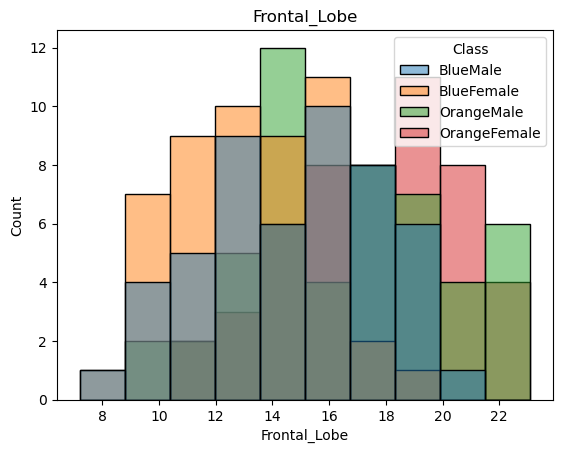

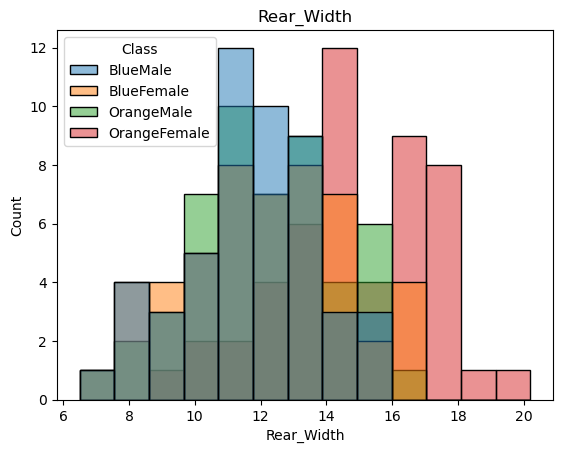

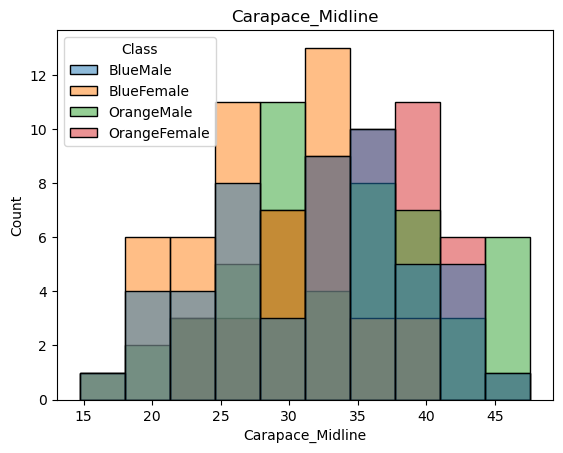

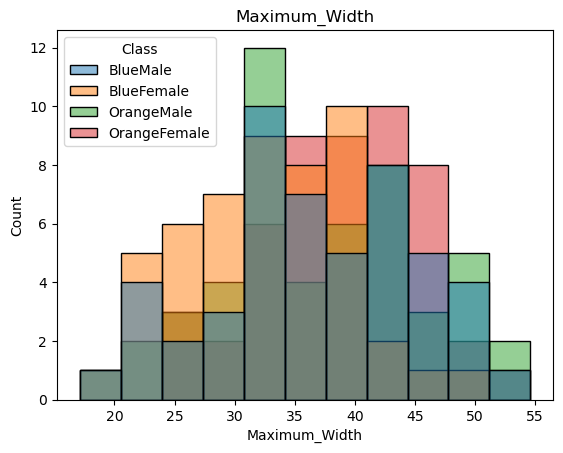

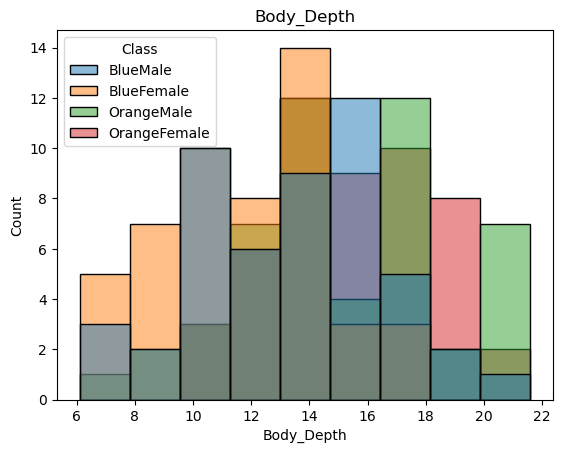

In [16]:
for i in data_EDA.columns:
    sns.histplot(data=data, x=i, hue='Class')
    plt.title(i)
    plt.show()

### Box plot

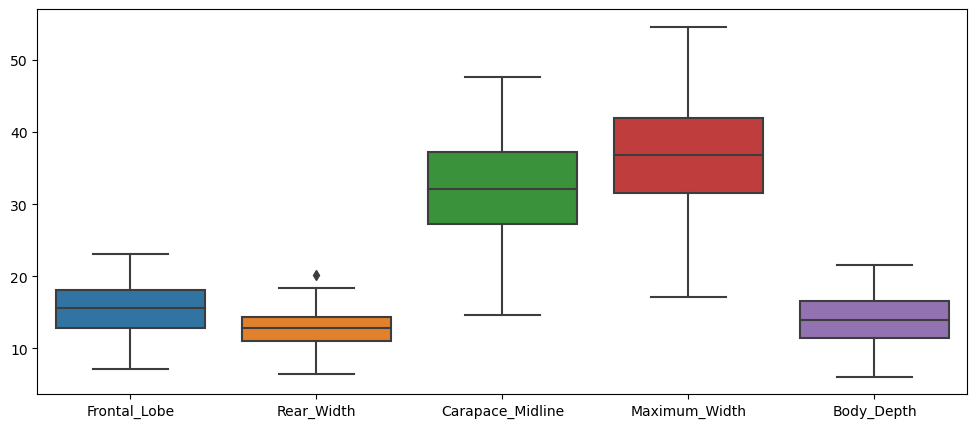

In [17]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=data_EDA)
plt.show()

#### Behaviour of different classes

In [18]:
data.columns

Index(['Species', 'sex', 'Frontal_Lobe', 'Rear_Width', 'Carapace_Midline',
       'Maximum_Width', 'Body_Depth', 'Class'],
      dtype='object')

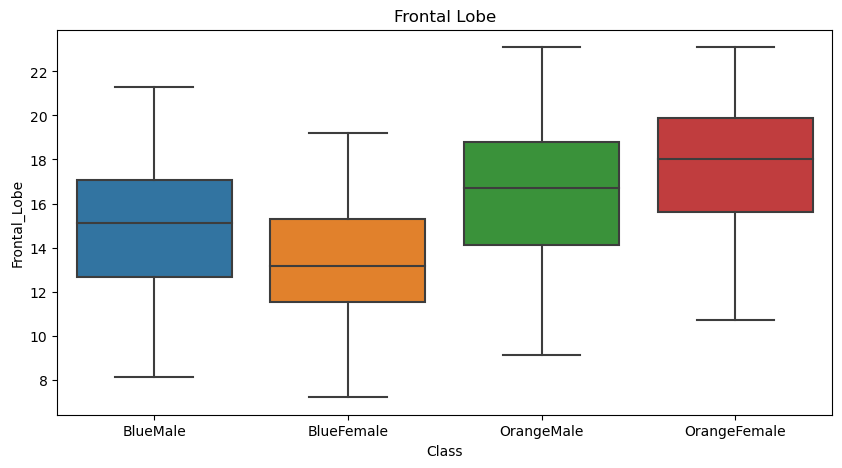

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, y='Frontal_Lobe', x='Class')
plt.title('Frontal Lobe')
plt.show()

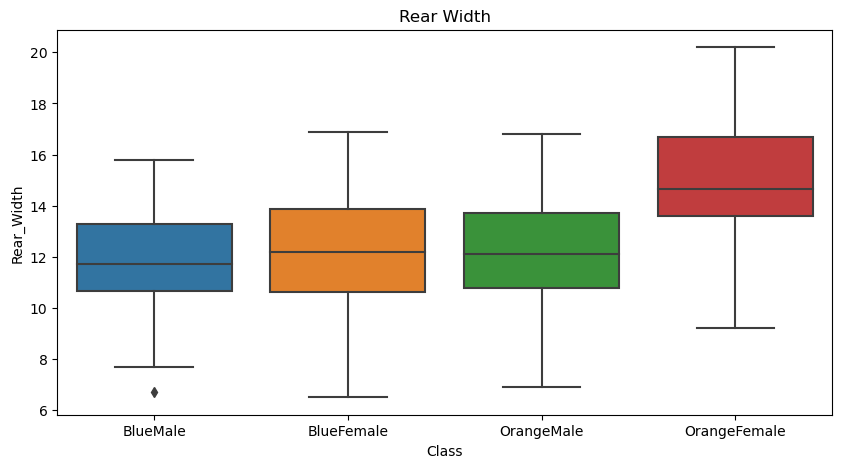

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, y='Rear_Width', x='Class')
plt.title('Rear Width')
plt.show()

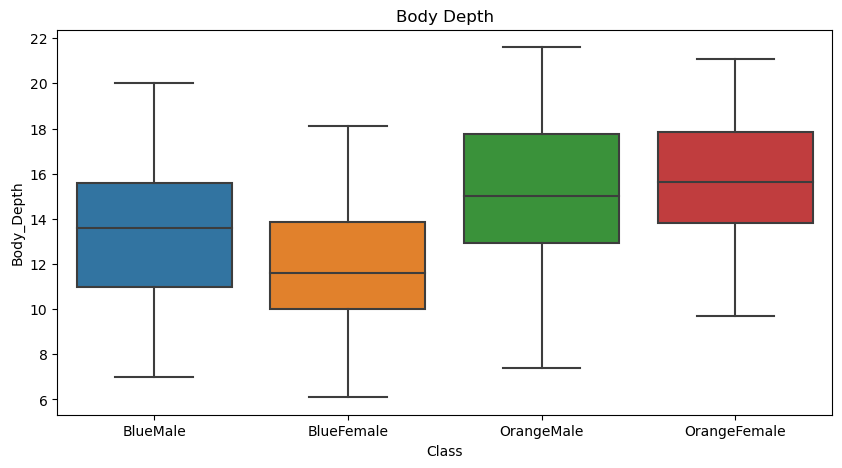

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, y='Body_Depth', x='Class')
plt.title('Body Depth')
plt.show()

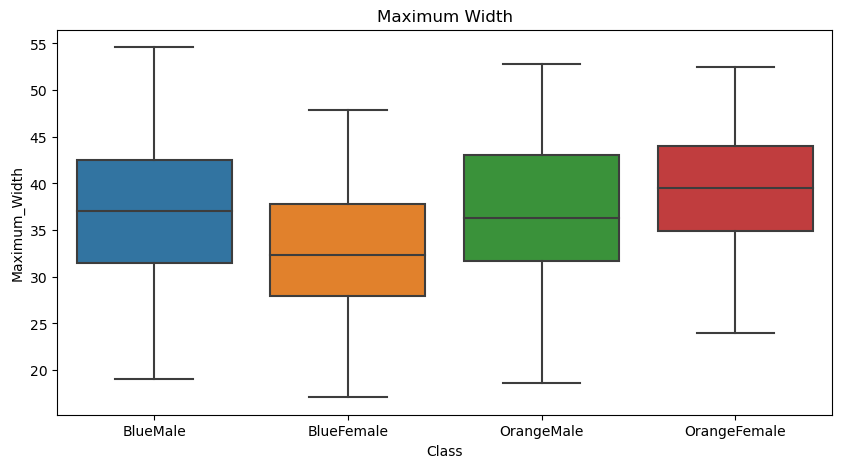

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, y='Maximum_Width', x='Class')
plt.title('Maximum Width')
plt.show()

#### Multivariate analysis

#### Pairplot

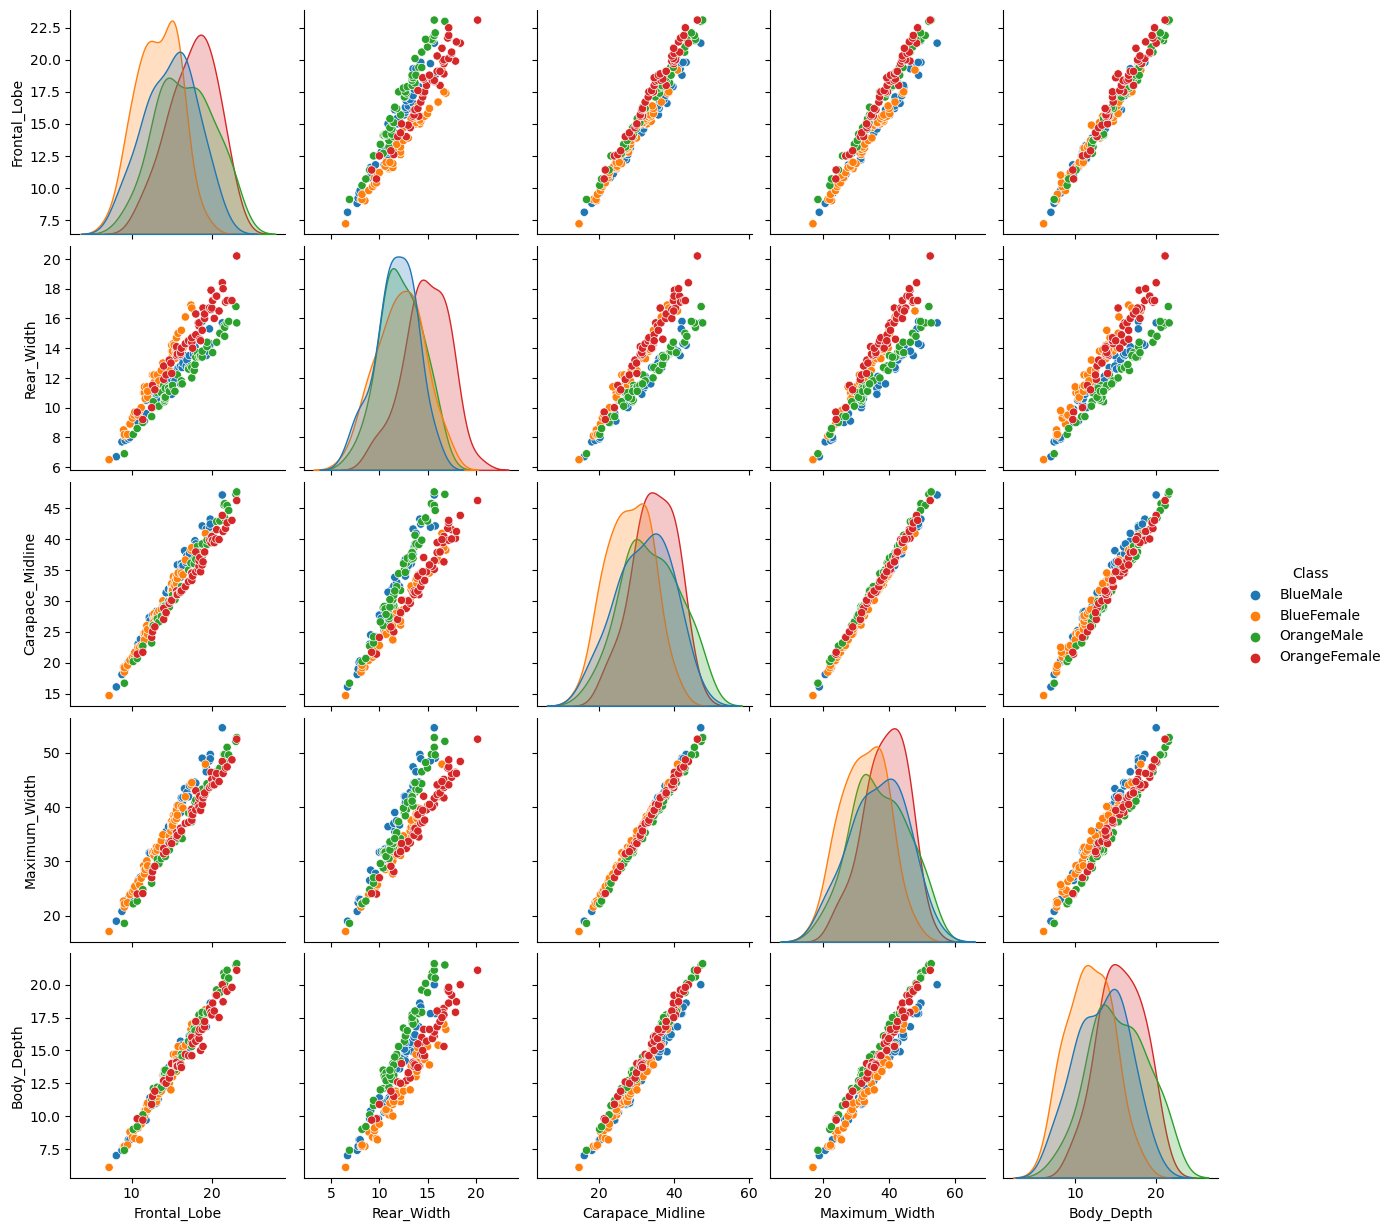

In [23]:
sns.pairplot(data=data, hue='Class')
plt.show()

### Need for using PCA

#### The high dimensionality of the dataset makes it difficult to manage and understand it. Dimensionality reduction methods allow:
    <li> Reduce unnecessary dimensions or noise
    <li> Reduce the computational cost of learning
    <li> Visualise data in 2D or 3D 

### Using PCA

* Data must be standardised before applying PCA

In [24]:
data_standardized = data.copy(deep=True)

In [25]:
SC = StandardScaler()

In [26]:
data_EDA.columns

Index(['Frontal_Lobe', 'Rear_Width', 'Carapace_Midline', 'Maximum_Width',
       'Body_Depth'],
      dtype='object')

In [27]:
data_columns = ['Frontal_Lobe', 'Rear_Width', 'Carapace_Midline', 'Maximum_Width',
        'Body_Depth']

In [28]:
data

Species     sex  Frontal_Lobe  Rear_Width  Carapace_Midline  \
0      Blue    Male           8.1         6.7              16.1   
1      Blue    Male           8.8         7.7              18.1   
2      Blue    Male           9.2         7.8              19.0   
3      Blue    Male           9.6         7.9              20.1   
4      Blue    Male           9.8         8.0              20.3   
..      ...     ...           ...         ...               ...   
195  Orange  Female          21.4        18.0              41.2   
196  Orange  Female          21.7        17.1              41.7   
197  Orange  Female          21.9        17.2              42.6   
198  Orange  Female          22.5        17.2              43.0   
199  Orange  Female          23.1        20.2              46.2   

     Maximum_Width  Body_Depth         Class  
0             19.0         7.0      BlueMale  
1             20.8         7.4      BlueMale  
2             22.4         7.7      BlueMale  
3             23.1         8.2      BlueMale  
4             23.0         8.2      BlueMale  
..             ...         ...           ...  
195           46.2        18.7  OrangeFemale  
196           47.2        19.6  OrangeFemale  
197           47.4        19.5  OrangeFemale  
198           48.7        19.8  OrangeFemale  
199           52.5        21.1  OrangeFemale  

[200 rows x 8 columns]

In [29]:
data_standardized[data_columns] = SC.fit_transform(data[data_columns])

In [30]:
data_standardized.describe().T

count          mean       std       min       25%       50%  \
Frontal_Lobe      200.0 -2.953193e-16  1.002509 -2.404365 -0.769523 -0.009465   
Rear_Width        200.0  5.639933e-16  1.002509 -2.430365 -0.677276  0.023959   
Carapace_Midline  200.0  7.105427e-17  1.002509 -2.451077 -0.680241 -0.000775   
Maximum_Width     200.0 -6.505907e-16  1.002509 -2.459741 -0.625872  0.049094   
Body_Depth        200.0  1.354472e-16  1.002509 -2.321439 -0.770008 -0.038200   

                       75%       max  
Frontal_Lobe      0.707571  2.155984  
Rear_Width        0.608322  2.906815  
Carapace_Midline  0.720938  2.181966  
Maximum_Width     0.711325  2.315960  
Body_Depth        0.752152  2.215766

* PCA will return explained variance ratio and all PCA - related parameters. 
* We can use the explained variance ratio and the singular values to decide how many components to keep.
* Remember that the components are the eigen vectors of the PCA

In [31]:
data_standardized[data_columns]

Frontal_Lobe  Rear_Width  Carapace_Midline  Maximum_Width  Body_Depth
0       -2.146232   -2.352450         -2.253926      -2.217772   -2.057989
1       -1.945462   -1.962875         -1.972282      -1.988538   -1.940899
2       -1.830736   -1.923917         -1.845543      -1.784775   -1.853083
3       -1.716010   -1.884960         -1.690638      -1.695629   -1.706721
4       -1.658647   -1.846002         -1.662474      -1.708364   -1.706721
..            ...         ...               ...            ...         ...
195      1.668399    2.049750          1.280706       1.246203    1.366870
196      1.754443    1.699132          1.351117       1.373555    1.630320
197      1.811806    1.738090          1.477856       1.399026    1.601048
198      1.983895    1.738090          1.534185       1.564583    1.688865
199      2.155984    2.906815          1.984816       2.048521    2.069405

[200 rows x 5 columns]

In [32]:
pca_model = PCA().fit(data_standardized[data_columns])

* explained_variance_ratio_ returns a vector of the variance explained by each dimension

In [33]:
pca_model.explained_variance_ratio_

array([0.95776696, 0.03033704, 0.00932659, 0.00222707, 0.00034234])

* explained_variance_ratio_.cumsum() returns vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions 

In [34]:
pca_model.explained_variance_ratio_.cumsum()

array([0.95776696, 0.988104  , 0.99743059, 0.99965766, 1.        ])

* singular-values_  returns the eigen values of each components

In [35]:
pca_model.singular_values_

array([30.94781021,  5.50790717,  3.05394742,  1.49233757,  0.58509446])

### Screeplot

* The screelot is used to determine the number of principal components to keep in a PCA.

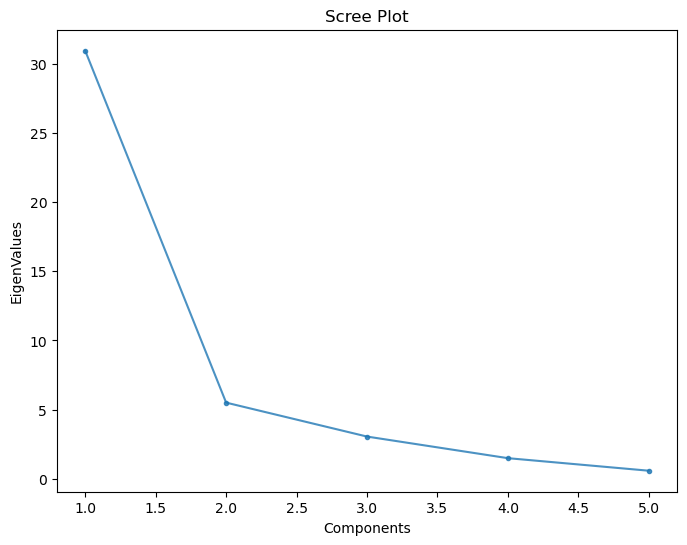

In [36]:
fig = plt.figure(figsize= (8 ,6))
plt.plot(range(1, len(pca_model.singular_values_)+1), pca_model.singular_values_ , alpha = 0.8, marker = '.')
y_label = plt.ylabel('EigenValues')
x_label = plt.xlabel('Components')
plt.title('Scree Plot')
plt.show()

* Looking to the Screeplot we can choose 2 components, but we are now going with 3

### % Of Explained Variance by Component

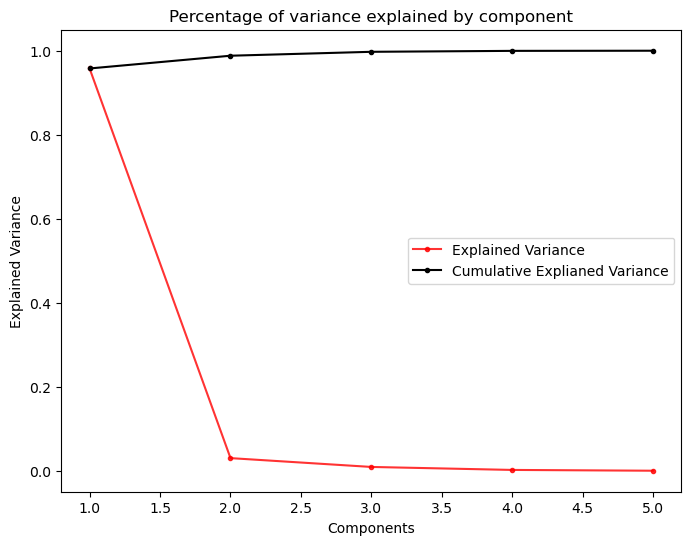

In [37]:
fig = plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_model.explained_variance_ratio_)+1), pca_model.explained_variance_ratio_, 
         marker = '.', alpha = 0.8, label = 'Explained Variance', color = 'red')
y_label = plt.ylabel('Explained Variance')
x_label = plt.xlabel('Components')
plt.plot(range(1, len(pca_model.explained_variance_ratio_)+1), pca_model.explained_variance_ratio_.cumsum(),
         marker = '.', label = 'Cumulative Explianed Variance', color = 'black')
plt.legend()
plt.title("Percentage of variance explained by component")
plt.show()

* We can also visualize the weights that the PCA assigns to each component.

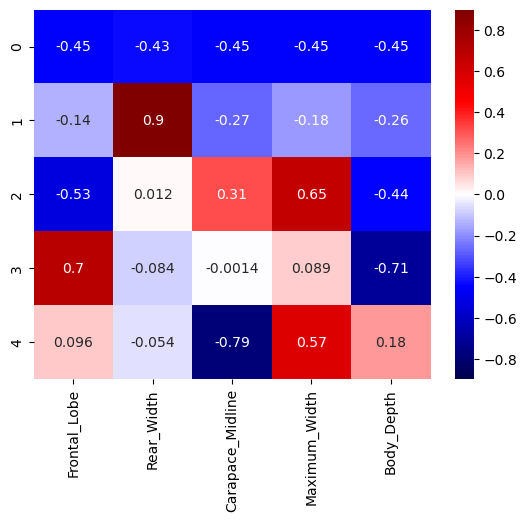

In [38]:
sns.heatmap(pca_model.components_, cmap='seismic', xticklabels=list(data_EDA.columns),
           vmin=-np.max(np.abs(pca_model.components_)), vmax=np.max(np.abs(pca_model.components_)), annot=True)
plt.show()

#### PCA: Transformation and Visualisation
* Now we can transform our dataset using the "trained" PCA. 
* Generally, for visualisation 2 or 3 components are chosen.
* We will choose 3 Components 

In [39]:
transformed = pca_model.transform(data_standardized[data_columns])

In [40]:
data_standardized[['PC1', 'PC2', 'PC3']] = transformed[:, :3]

In [41]:
data_standardized

Species     sex  Frontal_Lobe  Rear_Width  Carapace_Midline  \
0      Blue    Male     -2.146232   -2.352450         -2.253926   
1      Blue    Male     -1.945462   -1.962875         -1.972282   
2      Blue    Male     -1.830736   -1.923917         -1.845543   
3      Blue    Male     -1.716010   -1.884960         -1.690638   
4      Blue    Male     -1.658647   -1.846002         -1.662474   
..      ...     ...           ...         ...               ...   
195  Orange  Female      1.668399    2.049750          1.280706   
196  Orange  Female      1.754443    1.699132          1.351117   
197  Orange  Female      1.811806    1.738090          1.477856   
198  Orange  Female      1.983895    1.738090          1.534185   
199  Orange  Female      2.155984    2.906815          1.984816   

     Maximum_Width  Body_Depth         Class       PC1       PC2       PC3  
0        -2.217772   -2.057989      BlueMale  4.927573 -0.268445 -0.122258  
1        -1.988538   -1.940899      BlueMale  4.386176 -0.094074 -0.039232  
2        -1.784775   -1.853083      BlueMale  4.128664 -0.168876  0.033644  
3        -1.695629   -1.706721      BlueMale  3.883681 -0.246008  0.014501  
4        -1.708364   -1.706721      BlueMale  3.834055 -0.224166 -0.015067  
..             ...         ...           ...       ...       ...       ...  
195       1.246203    1.366870  OrangeFemale -3.390864  0.681516 -0.256877  
196       1.373555    1.630320  OrangeFemale -3.487880  0.243256 -0.318587  
197       1.399026    1.601048  OrangeFemale -3.586209  0.239493 -0.279724  
198       1.564583    1.688865  OrangeFemale -3.803830  0.147597 -0.284499  
199       2.048521    2.069405  OrangeFemale -4.976133  0.864731 -0.075123  

[200 rows x 11 columns]

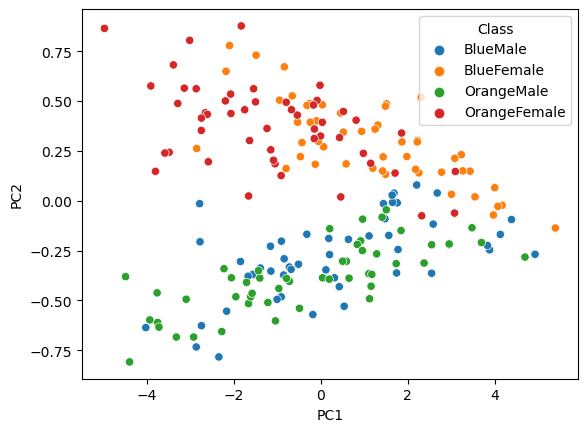

In [42]:
sns.scatterplot(data=data_standardized, x = 'PC1', y = 'PC2', hue='Class')
plt.show()

* We can see that the PCA does a good job with this data

### Visualise with 3 components

In [43]:
data_standardized.Class.unique()

array(['BlueMale', 'BlueFemale', 'OrangeMale', 'OrangeFemale'],
      dtype=object)

In [44]:
colors_crabs = {'BlueMale':'yellow', 'BlueFemale':'blue', 'OrangeMale':'orange', 'OrangeFemale':'green'}

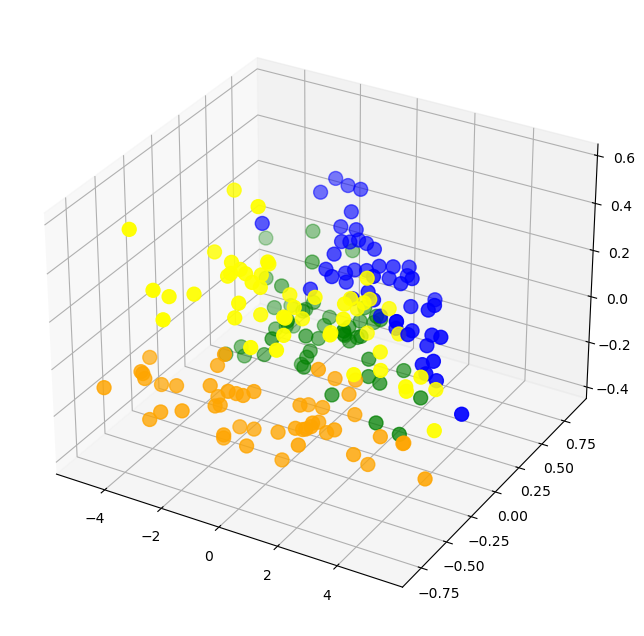

In [45]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(data_standardized.PC1, data_standardized.PC2, data_standardized.PC3,
           c=(data_standardized.Class.apply(lambda x: colors_crabs[x])), s=100)
plt.show()

In [46]:
px.scatter_3d(data_frame=data_standardized, x='PC1', y='PC2' ,z = 'PC3', color = 'Class')